
# HW3: Simple Linear Regression with Sacramento Real Estate Data

---

In this HW you will apply your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

**You are expected to create and enter MULTIPLE relevant cells in each part.**   
**Explain with markdown cells any reason that support your finding or action.**   
**Points may be deducted if no appropriate interpretation is provided.**

*you may download the dataset used in this HW from here: 1RW87ZmENMHrS8K9iPPwmnHfYxmb-w0Qr*


### 1. Read in the Sacramento housing data set.

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'17HbHBVlcAsqs0Yi7IGnZAt5u2-sl9B7L'}) # replace the id with id of file you want to access
downloaded.GetContentFile('drug-use-by-age.csv') 
downloaded = drive.CreateFile({'id':'1RW87ZmENMHrS8K9iPPwmnHfYxmb-w0Qr'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sacramento_real_estate_transactions.csv')


In [0]:
sac_csv = 'sacramento_real_estate_transactions.csv'

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis (EDA) on this data set. 

**Show how you exolore this dataset     
Explain any steps you take to clean/transform your data.   
Do not transform your data without any reasoning.**

In [59]:
# A:
housing = pd.read_csv('sacramento_real_estate_transactions.csv')
housing.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


In [60]:
housing.shape

(985, 12)

In [61]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [62]:
# Check the dtypes of the columns:
housing.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

**The type of zipcode should be string, not integer, we can't calculate the zipcode, so we need to convert the type of zip to string. **

In [0]:
housing['zip'] = housing['zip'].astype(str)

In [64]:
housing.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


**From the description of the dataset, there is 0 *beds* and 0 *bath*,* sq_ft* and* price* less than 0, so we will check these attributes one by one.**

In [65]:
housing.isnull().sum()  # check is there any null value per column

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [69]:
# check how many sq_ft less than 0, these data will delete

#for x in housing['sq__ft']:
   # if x < 0:
     # print(x)

housing[(housing.sq__ft<=0) & (housing.beds<= 0) & (housing.baths <= 0)].shape[0] 

108

In [41]:
print ( 'when sq__ft is less equal than 0, ther are {}'.format(housing.loc[housing['sq__ft'].values <= 0].shape[0]) )
print ( 'when beds is less equal than 0, ther are {}'.format(housing.loc[housing['beds'].values <= 0].shape[0]) )
print ( 'when baths is less equal than 0, ther are {}'.format(housing.loc[housing['baths'].values <= 0].shape[0]) )


when sq__ft is less equal than 0, ther are 172
when beds is less equal than 0, ther are 108
when baths is less equal than 0, ther are 108


**From the 2 cells above, there is only 1 value less than 0, we will clean it below, and there are 171 entries when sq__ft is 0, and 108 entries when beds and baths are 0 separately, there should be some reason, we will continue to check and make sure do we need to clean these entries.**

In [42]:
# test if sq__ft greater than 0, is there any house beds and baths is still 0
housing[((housing['beds'] == 0) | (housing['baths'] == 0)) & (housing['sq__ft'] > 0)].shape[0]


0

**From the cell above, there is no house when sq__ft is greater than 0, beds and baths are still 0, it indicate that 108 entries(either beds or baths is 0) are included in the 171 entries when sq__ft is 0. Given the large value of this kind of house, I guess, these houses which the features sq__ft are 0, perhaps they are under construction, however, they will impact the model building, and in the real life, if the sq__rt is 0, the house can't have any value, so we will delete these data, when the sq__rt is 0.  **

In [43]:
# check when price is less than 0, is it the same entry with the sq__ft less than 0
housing[housing['price'] <= 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


**This entry should be deleted, since the sq__ft and the price are both less than 0, they are invalid. The state is AC, not CA, let's check is there any other entry has the wrong label.**

In [44]:
housing[housing ['state'] != "CA"]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


**Only one entry has the wrong state label.**





In [45]:
# fliter out the data which the sq__ft is 0 and the state is not "CA"

housing = housing[(housing.sq__ft > 0) & (housing.state == 'CA')]
housing.shape

(813, 12)

**The cells above are about the EDA part.**

### 3. Our goal will be to predict the price. List variables that you think qualify as predictors of price in a SLR model. 

**For EACH of these variables you believe to be valid potential predictors in an SLR model, generate a sns.lmplot showing the relationship between the the feature variable and target variable.**

**In our common sense, the sq__ft, beds, and baths have some relationship with the price, and the number of beds and baths has relationship with the sq__ft, let's check each of them**

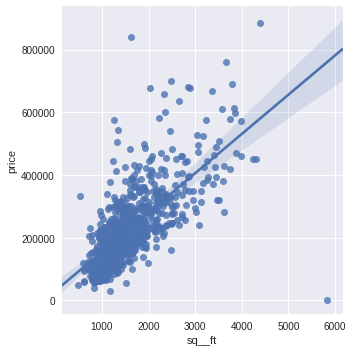

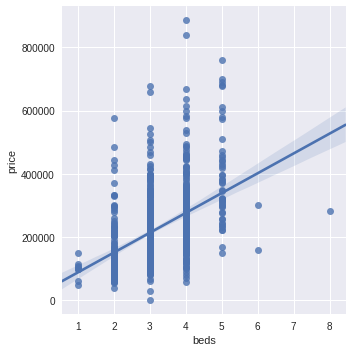

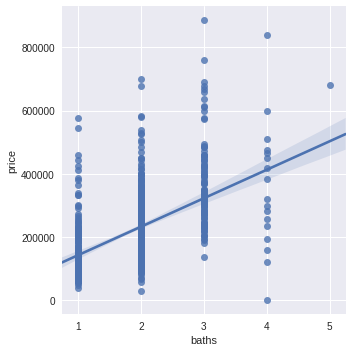

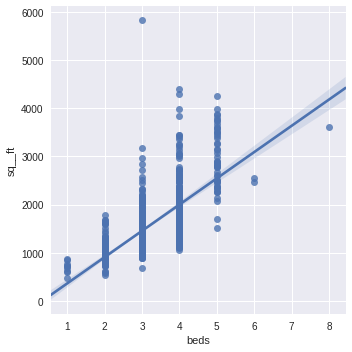

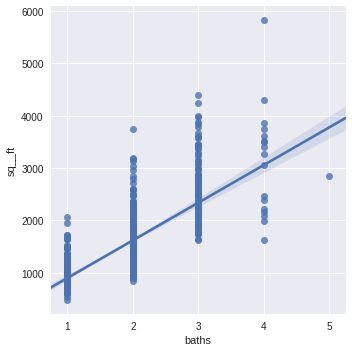

In [46]:
# A

sns.lmplot(x='sq__ft', y='price', data=housing)
plt.show()
sns.lmplot(x='beds', y='price', data=housing)
plt.show()
sns.lmplot(x='baths', y='price', data=housing)
plt.show()
sns.lmplot(x='beds', y='sq__ft', data=housing)
plt.show()
sns.lmplot(x='baths', y='sq__ft', data=housing)
plt.show()

### 4. Which SINGLE variable would be the best predictor of Y in a SLR model? Why?

**From the cell above, sq__ft is a better predictor than the other two, since sq__ft is a continous variable, while the beds and baths are all discrete variable, and from the last two plot, the bigger square feet, the house has more bedrooms and bathrooms, so sq__ft variable would be the best predictor of the price.**

** Later, we will use mutiple variables to train the model,  we will compare if the sq__ft is the best predictor**

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**
- **Report its score.**

In [47]:
# Create X and y.
X = housing[['sq__ft']]
y = housing[['price']]
#check X and y's type
print((type(X)))
print((type(X.values)))
print((type(y)))
print((type(y.values)))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(813, 1)
(813, 1)


In [48]:
from sklearn.linear_model import LinearRegression

# instantiate an object out of the LinearRegression class .
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [49]:
# fit the model
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

[29984.36172652]
[[125.31418258]]


In [51]:
# use score() to evaluate how well the trained model is.
lr.score(X,y)

0.4814995615437454

In [52]:
housing.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [0]:
y_fitted = lr.predict(X)
#y_fitted = lr.predict(X)

In [72]:
# we can do some test when we use all three variable, then we can compare the score and the MSE between the models.
lr1 = LinearRegression()
feature_cols = ['sq__ft', 'beds', 'baths']
X1 = housing[feature_cols] 
y1 = housing[['price']]
lr1.fit(X1, y1)
print(lr1.score(X1,y1))
y_fitted1 = lr1.predict(X1)

print(lr1.intercept_)
print(lr1.coef_)
print('MSE:', metrics.mean_squared_error(y1, y_fitted1))



0.18203162472419276
[120538.95054866]
[[ 2.08493711e+01 -7.70086275e+03  6.09157098e+04]]


NameError: ignored

**From the cell above, we can see when we choose three variables and sq__ft as the single variable, the MSE and the score are similar, so if only choose one feature, the sq__ft would be the best one.**

### 6. Interpret the intercept. Interpret the slope.

In [0]:
# A:
print(lr.intercept_)
print(lr.coef_)


**Interpreting the intercept :**

**It is the value of  y  when all independent variables are 0.
Here, it is the estimated price when the sq__ft is 0, however,  It does not make sense to interpret the price when the sq__ft is 0, since if the sq__ft is 0, the house can not have any value. **

**Interpreting the coefficient :**

**An increase of 1 sq__ft is associated with increasing the price by  the coefficient  .
Here, the sq__ft increase of 1 is associated with the price of around 125.31 dollars. **





### 7. Give a real life example of how this model could help people in prediction. Also give an example that the model can be used for inference purpose. You should consider non-technical people as users in your example.

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [0]:
# A:  y = 29984.36 + 125.31x

**Prediction example:
  The model is y = 29984.36 + 125.31x, if I am a real estate agent,  I will estimate the actual price of the houses based on this model, and compared to the given price,  whether the given price is reasonable, in order to help my customer to make a good decision.**
  
**Inference example:
If I am a investor, I would like to invest on the real estate, and I should predict and analysis what characteristics of a house and what areas are associated with perceived value. I can use this model to do some analysis before I make the decision.**


### 8: Using the model you came up with in Problem 5, calculate the residuals (MSE) and plot the targets vs. the prediction with the linear regression line.

In [73]:
# A:
from sklearn import metrics
import numpy as np
print('MSE:', metrics.mean_squared_error(y, y_fitted))

MSE: 7444498109.2912245


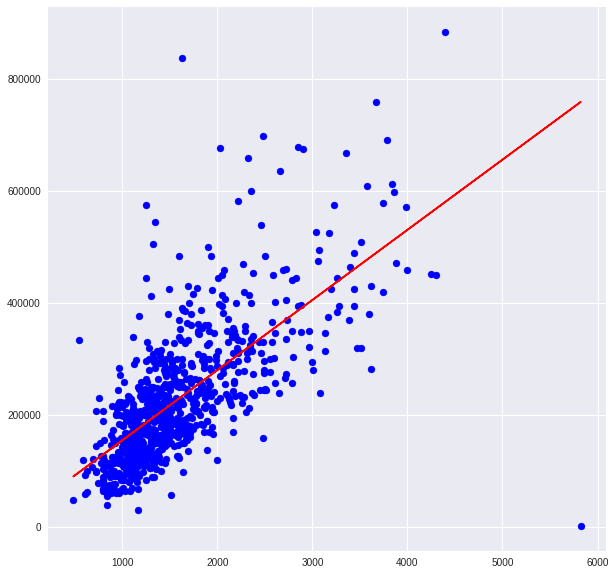

In [74]:
# Plot showing out linear forcast
fig = plt.figure(figsize=(10,10))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=10)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(X, y, c='b')
ax.plot(X, y_fitted, color='r')

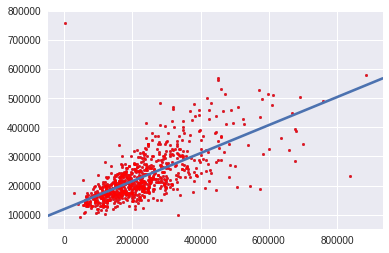

In [75]:
#look how our Predictions compared to the true values.
plt.scatter(y, y_fitted, s = 5)

sns.regplot(y, y_fitted, order=1, ci=None, scatter_kws={'color':'r', 's':9})


 **Given our last visual we can see that when the price greater than 400000, those spot more disperse, we could probably create a more insightful  model if we removed those outliars .**